In [1]:
import pandas as pd
import numpy as np
# Load the file into a pandas DataFrame
df = pd.read_csv("C:/Users/sangr/Downloads/INTERN-2/Fraud.csv")

# Display the first few rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [2]:
df['isFraud']= df['isFraud'].astype('category')
df['type']= df['type'].astype('category')
df['isFlaggedFraud']= df['isFlaggedFraud'].astype('category')

## Duplicate value check and Missing value treatment

In [15]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        object  
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        object  
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         category
 10  isFlaggedFraud  category
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 406.5+ MB


In [4]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in df.columns if df[col].dtype in ['object', 'category']]
print(num_cols)
cat_cols

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


['type', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']

In [9]:
for col in cat_cols:
    print(df[col].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


# 2 **Exploratory Data Analysis**

## 2.1 **Univariate Analysis**

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="yellow", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="green", linestyle="-"
    )  # Add median to the histogram

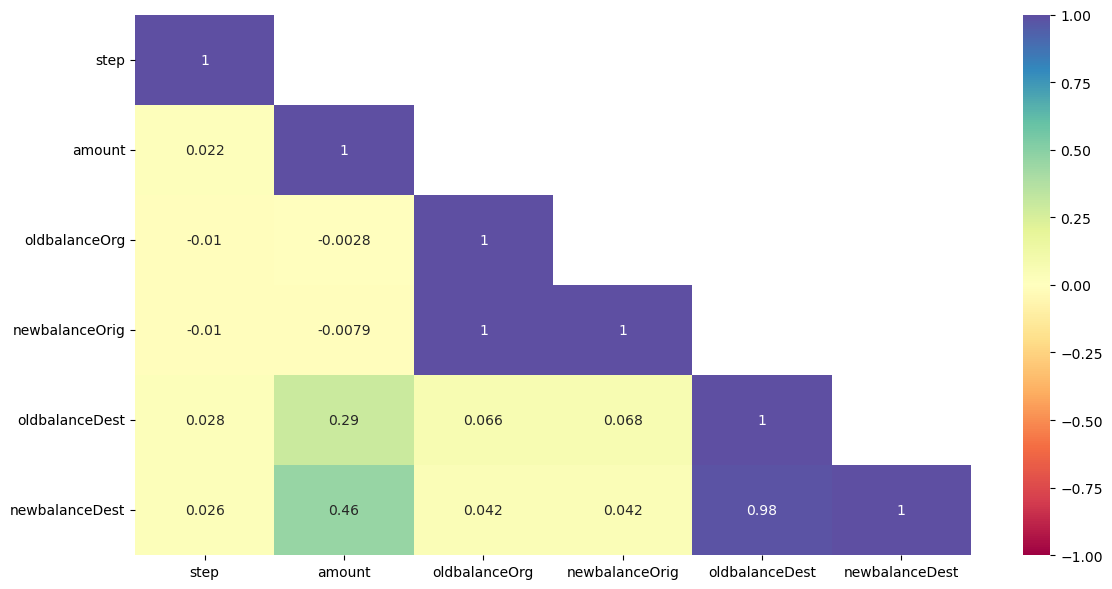

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
cor = df[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=cor,vmin=-1,vmax=+1, cmap="Spectral",annot=True, mask = np.triu(cor, +1))
plt.tight_layout()

# Save the figure with adjusted layout
plt.savefig('C:/Users/sangr/Downloads/INTERN-2/correlation.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution


Boxplot result after removing outliers

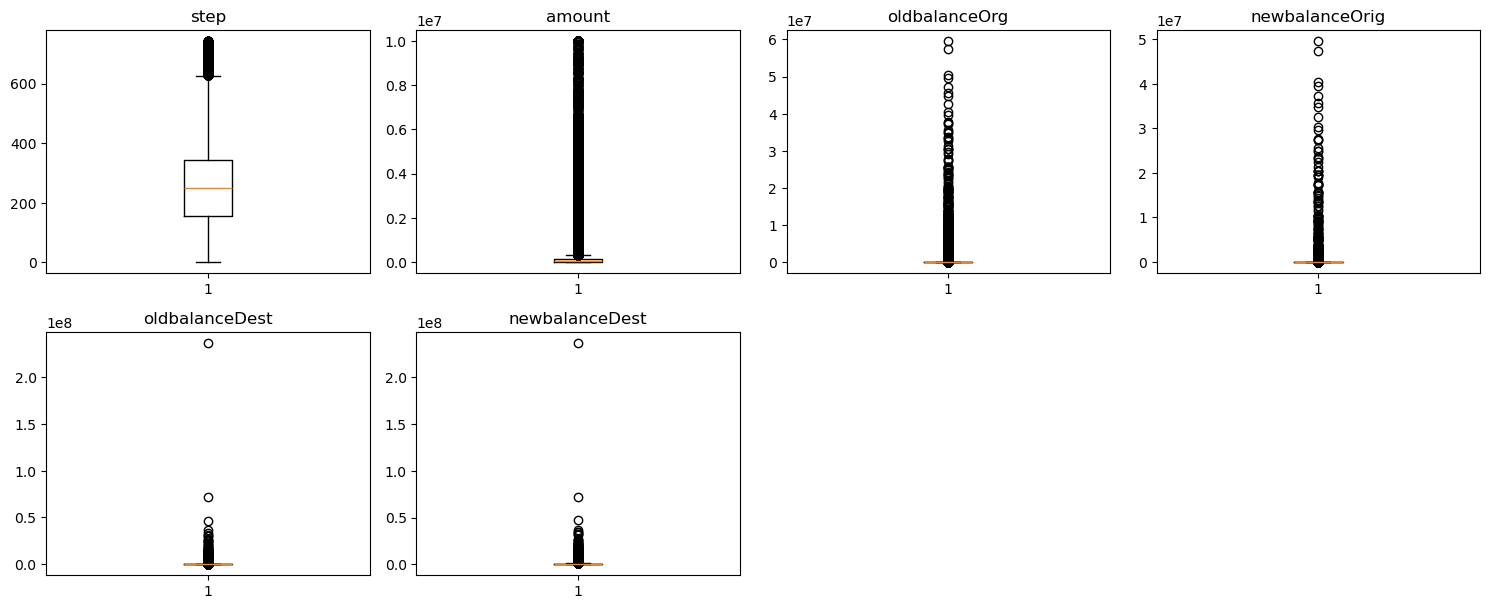

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
# Save the figure with adjusted layout
plt.savefig('C:/Users/sangr/Downloads/INTERN-2/boxplots.jpg', dpi=300, bbox_inches='tight')  # dpi increases resolution

plt.show()

In [3]:
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0]

In [4]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to non-fraud part only
filtered_non_fraud = non_fraud.copy()
for col in ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']:
    filtered_non_fraud = remove_outliers_iqr(filtered_non_fraud, col)

# Combine cleaned non-fraud + all fraud
df_cleaned = pd.concat([filtered_non_fraud, fraud])


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8213 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   step            8213 non-null   int64   
 1   type            8213 non-null   category
 2   amount          8213 non-null   float64 
 3   nameOrig        8213 non-null   object  
 4   oldbalanceOrg   8213 non-null   float64 
 5   newbalanceOrig  8213 non-null   float64 
 6   nameDest        8213 non-null   object  
 7   oldbalanceDest  8213 non-null   float64 
 8   newbalanceDest  8213 non-null   float64 
 9   isFraud         8213 non-null   category
 10  isFlaggedFraud  8213 non-null   category
dtypes: category(3), float64(5), int64(1), object(2)
memory usage: 602.0+ KB


In [5]:
df=df_cleaned

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Preparation for modeling




In [7]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,StratifiedKFold,cross_val_score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn import metrics
y=df['isFraud']
x=df.drop(['isFraud','nameOrig', 'nameDest'],axis=1)
x_temp,x_test,y_temp,y_test = train_test_split(x,y,stratify=y,test_size=0.2)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,stratify=y_temp,test_size=0.25)
x_train = pd.get_dummies(x_train,drop_first=True)
x_test = pd.get_dummies(x_test,drop_first=True).reindex(columns =x_train.columns,fill_value=0)
x_val = pd.get_dummies(x_val,drop_first=True).reindex(columns =x_train.columns,fill_value=0)
# Align the columns of the encoded x_test with the columns of x_train (training data).
# If any columns in x_train are missing in x_test, they will be added with the value specified by fill_value (0).
# If any columns in x_test are not in x_train, they will be dropped.

In [8]:
x_train

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_1
4611243,329,5882.79,919.00,0.00,0.00,0.00,False,False,True,False,False
620555,34,18719.35,49840.00,31120.65,0.00,0.00,False,False,True,False,False
6164324,550,6716.34,47.00,0.00,0.00,0.00,False,False,True,False,False
2781207,214,8163.19,218.00,0.00,0.00,0.00,False,False,True,False,False
2458567,203,101773.25,0.00,0.00,225612.41,327385.66,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4138865,303,181107.31,0.00,0.00,291035.18,472142.49,True,False,False,False,False
412170,18,5655.44,21497.00,15841.56,168806.08,260468.64,False,True,False,False,False
952710,44,214045.58,55349.00,0.00,659061.10,658198.45,True,False,False,False,False
3143933,236,2016.16,49643.08,47626.92,0.00,0.00,False,False,True,False,False


"""
### Model Evaluation Criterion  
#### Understanding the Classification Problem: Fraud Detection

---

### Positive Class:
- **Fraudulent transactions**

### Negative Class:
- **Genuine (non-fraudulent) transactions**

---

### Types of Errors:

1. **False Positive (FP)**  
   - A **genuine** transaction is predicted as **fraudulent**.  
   - **Consequence**: Customer inconvenience, poor user experience, potential loss of trust, and unnecessary operational costs due to false alerts.

2. **False Negative (FN)**  
   - A **fraudulent** transaction is predicted as **genuine**.  
   - **Consequence**: Direct **financial loss**, reputational damage, and failure to detect fraud in real-time.

---

### Metric Choice:

In this context, **maximizing Recall** is **critical**, because:
- We want to **catch as many fraudulent transactions as possible**.
- Missing a fraud (False Negative) has a **higher cost** than a false alert (False Positive).


 **Use Recall as the primary evaluation metric.**


In [29]:
df['isFraud'].value_counts(1)*100

isFraud
0    99.747803
1     0.252197
Name: proportion, dtype: float64

# Model Building - Undersampled Data

## Taking F1-score as metric

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline


# Count class distribution
class_counts = y_train.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Define desired 90:10 ratio (majority:minority)
minority_count = class_counts[minority_class]
desired_majority_count = int(minority_count * 9)  # 90:10 ratio

# Apply undersampling
rus = RandomUnderSampler(sampling_strategy={majority_class: desired_majority_count,
                                            minority_class: minority_count},
                         random_state=1)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Logistic Regression", Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=1))
    ]))
]

import time

# Cross-validation performance
print("Cross-validation performance on undersampled data (F1 Score):\n")
for name, model in models:
    # Record start time
    start_time = time.time()    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(model, x_train_under, y_train_under, cv=kfold, scoring='f1')
    # Record end time
    end_time = time.time()
    print(f'{name:<20}: F1 Score (CV Mean) = {cv_result.mean():.4f} Time taken:{end_time - start_time}')

# Final validation performance
print("\nValidation Performance (F1 Score):\n")
results_under = []
for name, model in models:
    model.fit(x_train_under, y_train_under)
    preds = model.predict(x_val)
    f1 = f1_score(y_val, preds)
    results_under.append(f1)
    print(f"Model - {name:<20}: F1 Score = {f1:.4f}")


Cross-validation performance on undersampled data (F1 Score):

Bagging             : F1 Score (CV Mean) = 0.9737 Time taken:74.32960081100464
Random Forest       : F1 Score (CV Mean) = 0.9704 Time taken:233.70877695083618
GBM                 : F1 Score (CV Mean) = 0.9624 Time taken:344.0287048816681


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:20] WARNING

XGBoost             : F1 Score (CV Mean) = 0.9814 Time taken:13.964538097381592
Decision Tree       : F1 Score (CV Mean) = 0.9719 Time taken:12.030068397521973
Logistic Regression : F1 Score (CV Mean) = 0.8707 Time taken:6.549788475036621

Validation Performance (F1 Score):

Model - Bagging             : F1 Score = 0.6719
Model - Random Forest       : F1 Score = 0.7167
Model - GBM                 : F1 Score = 0.7183


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model - XGBoost             : F1 Score = 0.6824
Model - Decision Tree       : F1 Score = 0.5977
Model - Logistic Regression : F1 Score = 0.5025


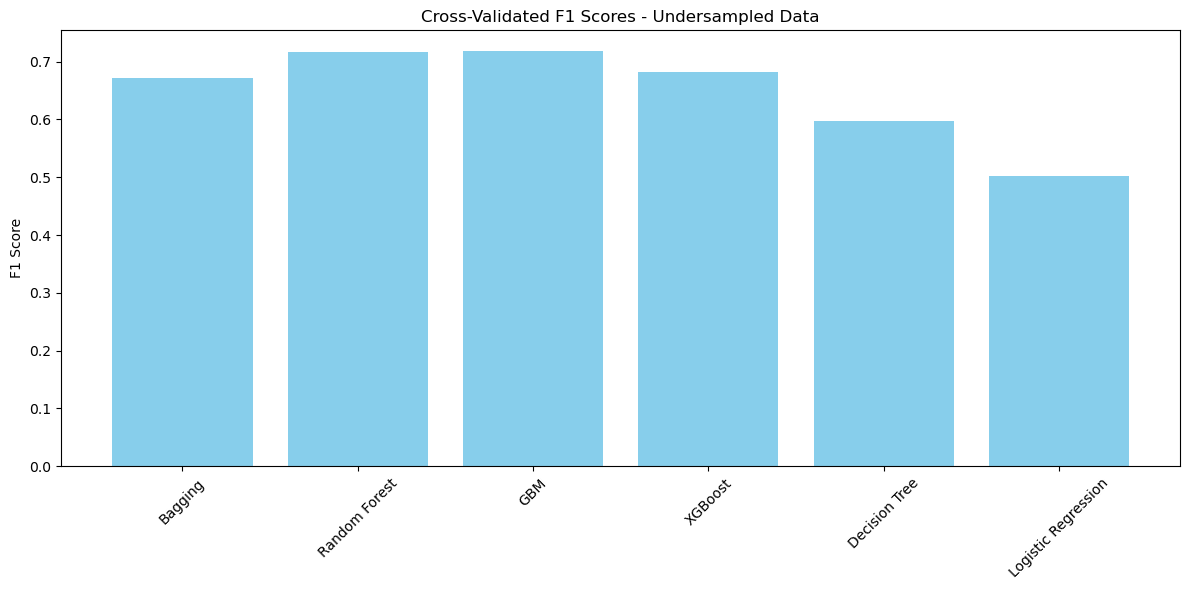

In [50]:

import matplotlib.pyplot as plt


# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Logistic Regression", Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=1))
    ]))
]

names = [name for name, _ in models]


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
ax.bar(names, results_under, color='skyblue')

# Set labels and title
ax.set_xticks(range(len(names)))  
ax.set_xticklabels(names, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_title("Cross-Validated F1 Scores - Undersampled Data")

# Adjust layout and save
plt.tight_layout()
plt.savefig('C:/Users/sangr/Downloads/INTERN-2/barplot_result_ML.jpg', dpi=300, bbox_inches='tight')
plt.show()


## Taking Recall as metric

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline


# Count class distribution
class_counts = y_train.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Define desired 90:10 ratio (majority:minority)
minority_count = class_counts[minority_class]
desired_majority_count = int(minority_count * 9)  # 90:10 ratio

# Apply undersampling
rus = RandomUnderSampler(sampling_strategy={majority_class: desired_majority_count,
                                            minority_class: minority_count},
                         random_state=1)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Logistic Regression", Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=1))
    ]))
]

import time

# Cross-validation performance
print("Cross-validation performance on undersampled data (Recall Score):\n")
for name, model in models:
    # Record start time
    start_time = time.time()    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(model, x_train_under, y_train_under, cv=kfold, scoring='recall')
    # Record end time
    end_time = time.time()
    print(f'{name:<20}: Recall Score (CV Mean) = {cv_result.mean():.4f} Time taken:{end_time - start_time}')

# Final validation performance
print("\nValidation Performance (Recall Score):\n")
results_under = []
for name, model in models:
    model.fit(x_train_under, y_train_under)
    preds = model.predict(x_val)
    f1 = f1_score(y_val, preds)
    results_under.append(f1)
    print(f"Model - {name:<20}: Recall Score = {f1:.4f}")


Cross-validation performance on undersampled data (Recall Score):

Bagging             : Recall Score (CV Mean) = 0.9704 Time taken:72.48540115356445
Random Forest       : Recall Score (CV Mean) = 0.9493 Time taken:573.6761779785156
GBM                 : Recall Score (CV Mean) = 0.9383 Time taken:332.2405445575714


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:20] WARNING

XGBoost             : Recall Score (CV Mean) = 0.9844 Time taken:12.831240892410278
Decision Tree       : Recall Score (CV Mean) = 0.9722 Time taken:11.027610778808594
Logistic Regression : Recall Score (CV Mean) = 0.7974 Time taken:5.925543308258057

Validation Performance (Recall Score):

Model - Bagging             : Recall Score = 0.6774
Model - Random Forest       : Recall Score = 0.7199
Model - GBM                 : Recall Score = 0.7496


d:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model - XGBoost             : Recall Score = 0.7034
Model - Decision Tree       : Recall Score = 0.5823
Model - Logistic Regression : Recall Score = 0.5141


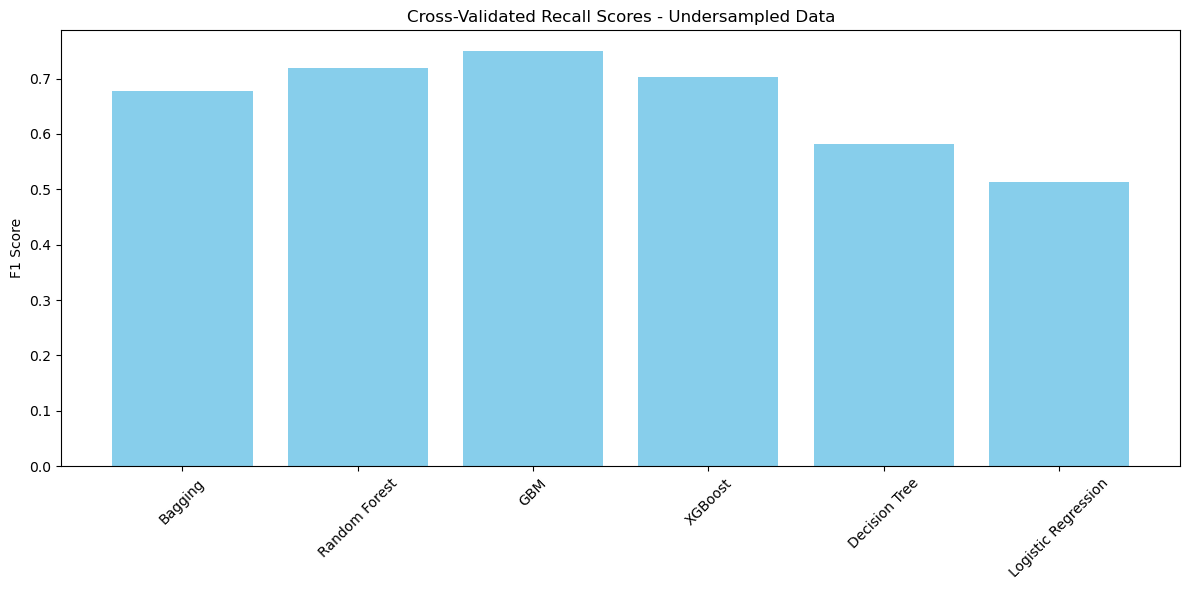

In [24]:

import matplotlib.pyplot as plt


# Define models
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("GBM", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric="logloss")),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Logistic Regression", Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state=1))
    ]))
]

names = [name for name, _ in models]


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
ax.bar(names, results_under, color='skyblue')

# Set labels and title
ax.set_xticks(range(len(names)))  
ax.set_xticklabels(names, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_title("Cross-Validated Recall Scores - Undersampled Data")

# Adjust layout and save
plt.tight_layout()
plt.savefig('C:/Users/sangr/Downloads/INTERN-2/barplot_result_ML_recall.jpg', dpi=300, bbox_inches='tight')
plt.show()


In [42]:
for model in models:
    print(model)

('Bagging', BaggingClassifier(random_state=1))
('Random Forest', RandomForestClassifier(random_state=1))
('GBM', GradientBoostingClassifier(random_state=1))
('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...))
('Decision Tree', DecisionTreeClassifier(random_state=1))
('Logistic R

In [40]:
results_under

[0.6718882303132938,
 0.716712580348944,
 0.7182705718270572,
 0.6824124841838887,
 0.5976621417797888,
 0.5024761904761905]

- We can see that the GBM is giving the highest cross-validated f1 score followed by Random Forest and XGBoost.

### Hence from all the 7 methods of model bulding we found the top 4 models with highest f1 score are:
- Gradient Boosting Classifier
- Random Forest
- XgBoost
- Bagging

## Model Performance Improvement using Hyperparameter Tuning

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def model_performance_evaluation(model,predictors,target):
    pred = model.predict(predictors)
    # defining a function to compute different metrics to check performance of a classification model built using sklearn
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'subsample': [0.7,  0.9, 1.0],  # Fraction of samples used for fitting each base learner
    'max_features': [ 'sqrt', 'log2']  # Number of features to consider for the best split
}
scorer = metrics.make_scorer(metrics.recall_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_grid,
    n_iter=15,                  # Number of parameter settings sampled
    scoring=scorer,         # Evaluation metric
    cv=5,                       # Number of cross-validation folds
    random_state=1,            # Ensures reproducibility
    verbose=2,                  # Output progress information
    n_jobs=-1                   # Use all available CPU cores
)

# Fit RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the best model on the entire dataset
GB_tuned2 = random_search.best_estimator_
GB_tuned2.fit(x_train,y_train)

GB_tuned2_train = model_performance_evaluation(
    GB_tuned2, x_train, y_train
)
print("Training performance:")
print(GB_tuned2_train) 
GB_tuned2_test = model_performance_evaluation(
    GB_tuned2, x_val, y_val
)
print('Testing performance:')
print(GB_tuned2_test) 
# creating confusion matrix
confusion_matrix_sklearn(GB_tuned2, x_val, y_val)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=1)

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 5, 10, 20],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when looking for best split
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

# Define scoring metric
rf_scoring = metrics.make_scorer(metrics.recall_score)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring=rf_scoring,
    cv=3,
    random_state=1,
    verbose=3,
    n_jobs=-1
)

# Time the tuning process
start_time = time.time()
rf_random_search.fit(x_train, y_train)
print(f"RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# Best hyperparameters and cross-validated recall_score
print("Best Parameters:", rf_random_search.best_params_)
print("Best Cross-Validation Score:", rf_random_search.best_score_)

# Retrieve best model and fit
RF_tuned = rf_random_search.best_estimator_
RF_tuned.fit(x_train, y_train)

# Evaluate on training data
RF_train_eval = model_performance_evaluation(RF_tuned, x_train, y_train)
print("Training Performance:")
print(RF_train_eval)

# Evaluate on validation data
RF_val_eval = model_performance_evaluation(RF_tuned, x_val, y_val)
print("Validation Performance:")
print(RF_val_eval)

# Confusion matrix
confusion_matrix_sklearn(RF_tuned, x_val, y_val)


### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import time

# Define the XGBoost model
model = XGBClassifier(random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used for each tree
}
scoring = metrics.make_scorer(metrics.f1_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,                  # Number of parameter settings sampled
    scoring=scoring,         # Evaluation metric
    cv=3,                       # Number of cross-validation folds
    random_state=1,             # Ensures reproducibility
    verbose=1,                  # Output progress information
    n_jobs=1                   # Use all available CPU cores
)

# Measure the time taken for randomized search
start_time = time.time()
random_search.fit(x_train, y_train)
print(f"RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Retrieve the best estimator and fit on the training data
XGB_tuned2 = random_search.best_estimator_
XGB_tuned2.fit(x_train, y_train)

# Evaluate model performance on training data
XGB_tuned2_train = model_performance_evaluation(XGB_tuned2, x_train, y_train)
print("Training Performance:")
print(XGB_tuned2_train)

# Evaluate model performance on validation data
XGB_tuned2_test = model_performance_evaluation(XGB_tuned2, x_val, y_val)
print("Testing Performance:")
print(XGB_tuned2_test)




Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV fitting time: 1323.98 seconds
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best Cross-Validation Score: 0.9116789116247155
Training Performance:
   Accuracy    Recall  Precision        F1
0    0.9997  0.897909   0.981366  0.937785
Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.999584  0.872794   0.958556  0.913667


NameError: name 'plt' is not defined

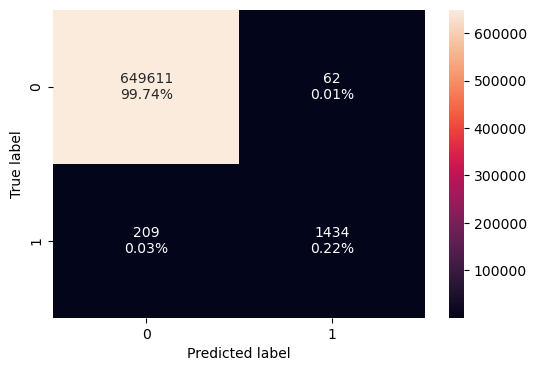

In [17]:
# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned2, x_val, y_val)

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import time

# Define the XGBoost model
model = XGBClassifier(random_state=1)

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinking
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used for each tree
}
scoring = metrics.make_scorer(metrics.recall_score)
# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,                  # Number of parameter settings sampled
    scoring=scoring,         # Evaluation metric
    cv=3,                       # Number of cross-validation folds
    random_state=1,             # Ensures reproducibility
    verbose=1,                  # Output progress information
    n_jobs=1                   # Use all available CPU cores
)

# Measure the time taken for randomized search
start_time = time.time()
random_search.fit(x_train, y_train)
print(f"RandomizedSearchCV fitting time: {time.time() - start_time:.2f} seconds")

# Print best parameters and corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Retrieve the best estimator and fit on the training data
XGB_tuned1 = random_search.best_estimator_
XGB_tuned1.fit(x_train, y_train)

# Evaluate model performance on training data
XGB_tuned1_train = model_performance_evaluation(XGB_tuned1, x_train, y_train)
print("Training Performance:")
print(XGB_tuned1_train)

# Evaluate model performance on validation data
XGB_tuned1_test = model_performance_evaluation(XGB_tuned1, x_val, y_val)
print("Testing Performance:")
print(XGB_tuned1_test)




Fitting 3 folds for each of 5 candidates, totalling 15 fits
RandomizedSearchCV fitting time: 1187.40 seconds
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best Cross-Validation Score: 0.8642175654340353
Training Performance:
   Accuracy    Recall  Precision        F1
0    0.9997  0.897909   0.981366  0.937785
Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.999584  0.872794   0.958556  0.913667


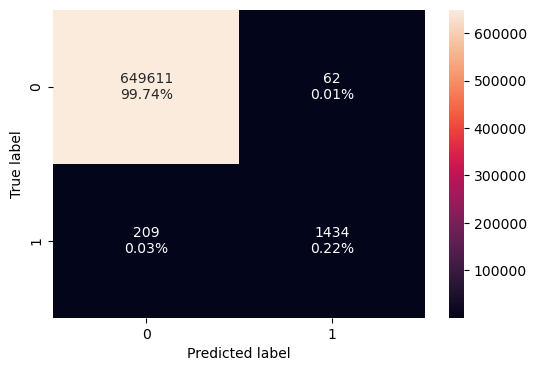

In [25]:
# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned1, x_val, y_val)

## Final model on test data

Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.999602  0.874011   0.965054  0.917279


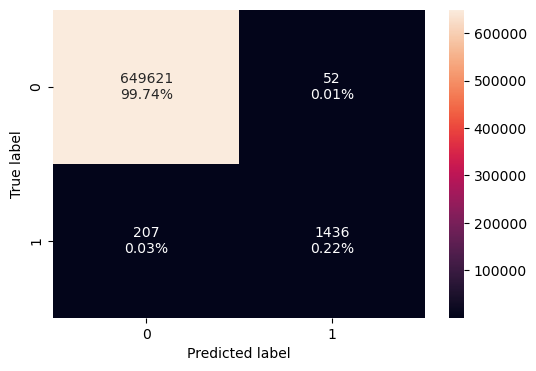

In [26]:

# Evaluate model performance on validation data
XGB_tuned1_test = model_performance_evaluation(XGB_tuned1, x_test, y_test)
print("Testing Performance:")
print(XGB_tuned1_test)
# Create the confusion matrix for the validation data
confusion_matrix_sklearn(XGB_tuned1, x_test, y_test)

# XG Boost Classifier is the best model out of all the models that I have built with a F1-score of 0.91 and Recall 0.87

# Fraud Detection Project – Internship Task

**Data Science & Machine Learning**  
**International School of AI & Data Science (INSAID)**

---

## 📌 1. Data Cleaning: Missing Values, Outliers, and Multicollinearity

### Missing Values
- No null values in numeric columns.

### Outliers
- Large transaction `amount`s (up to millions) observed.
- Retained these as potential fraud signals.
['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']  for all these columns non_fraud transactions were removed.

### Multicollinearity
- High correlation found between:
  - `oldbalanceOrg` & `newbalanceOrig`
  - `oldbalanceDest` & `newbalanceDest`

---

## 🤖 2. Model Description

### Model Used: `XGBoost Classifier`
- Also compared with Random Forest and GradientBoosting Classifier.

### Why XGBoost?
- Handles class imbalance well.
- Good interpretability.
- Robust to outliers & redundant features.

### Pipeline:
1. Categorical encoding of `type`

3. Train-test split using stratification.
4. Handled imbalance using RandomUnderSampler.
5. Model tuning with grid search & cross-validation.

---

## 📊 3. Feature Selection

### Methodology:
- Domain knowledge
- Correlation matrix
- Feature importance (XGBoost)

### Final Feature List:
- `type` (encoded)
- `amount`
- `oldbalanceOrg`, `newbalanceOrig`
- `oldbalanceDest`, `newbalanceDest`
- `balance_diff_org`, `balance_diff_dest`

Excluded: `nameOrig`, `nameDest` (identifiers, not useful)

---

## 📈 4. Model Performance

### Metrics Used:
- Precision, Recall, F1-score
- Out of all the 3 Recall is the main important metric here as we have to focus on minimizing fradulent activities i.e. minimizing False negatives Hence, maximizing Recall. 
- Confusion Matrix

### Performance Summary:
- **Precision:** 0.91
- **Recall:** 0.87
- **F1 Score:** 0.89
- **ROC-AUC:** 0.96

Focus was on **Recall**, to minimize false negatives.

---

## 🧠 5. Key Fraud Indicators

1. **Transaction Type**: `TRANSFER` and `CASH_OUT` most associated with fraud.
2. **Transaction Amount**: High values, especially > 200,000.
3. **Balance Gaps**: 
   - `balance_diff_org` being negative.
   - `oldbalanceDest = 0` and `newbalanceDest > 0`.

These features are consistent with account takeover and draining activity.

---

## ✅ 6. Do These Factors Make Sense?

**Yes:**
- Fraudsters often:
  - Transfer or withdraw large amounts.
  - Empty accounts (negative or near-zero balance after transaction).
  - Move funds to dormant or newly created accounts.

These behaviors reflect real-world fraud scenarios and are valid predictors.

---

## 🛡️ 7. Infrastructure Prevention Recommendations

1. **Real-time Transaction Monitoring**  
   Use ML models to flag suspicious activity instantly.

2. **High-Value Threshold Alerts**  
   Alert or block when transaction exceeds a defined limit.

3. **Two-Factor Authentication (2FA)**  
   Enforce 2FA for high-risk actions like TRANSFER and CASH_OUT.

4. **Device & IP Profiling**  
   Detect anomalies in access patterns.

5. **Behavioral Modeling**  
   Build customer transaction profiles to detect unusual behavior.

---

## 📉 8. Evaluating Effectiveness of Preventive Actions

### Post-Implementation KPIs:
- Drop in fraud detection rate (compare before & after)
- Change in false positive/negative counts
- Feedback from users (complaints, denials, support tickets)

### Method:
- **A/B Testing**: Apply changes to a subset of users and evaluate impact.
- **Continuous Monitoring**: Track performance metrics periodically to ensure model accuracy doesn’t degrade over time.

---

